In [39]:
import findspark
findspark.init()

In [40]:
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName('Aviation Accident').getOrCreate()

In [41]:
spark

In [42]:
df_spypark=spark.read.csv('AviationData.csv', inferSchema=True,header=True)

In [43]:
df_spypark.show()

+--------------+------------------+---------------+----------+----------------+-------------+---------+----------+------------+------------------+---------------+---------------+-----------------+-------------------+-----------------+------------------+-------------+-----------------+-------------+--------------------+--------+-----------------+-----------+--------------------+----------------------+--------------------+---------------+-----------------+---------------------+--------------+----------------+
|      Event.Id|Investigation.Type|Accident.Number|Event.Date|        Location|      Country| Latitude| Longitude|Airport.Code|      Airport.Name|Injury.Severity|Aircraft.damage|Aircraft.Category|Registration.Number|             Make|             Model|Amateur.Built|Number.of.Engines|  Engine.Type|     FAR.Description|Schedule|Purpose.of.flight|Air.carrier|Total.Fatal.Injuries|Total.Serious.Injuries|Total.Minor.Injuries|Total.Uninjured|Weather.Condition|Broad.phase.of.flight| Report

In [44]:
df_spypark.columns

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [45]:
df_spypark.printSchema()

root
 |-- Event.Id: string (nullable = true)
 |-- Investigation.Type: string (nullable = true)
 |-- Accident.Number: string (nullable = true)
 |-- Event.Date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Airport.Code: string (nullable = true)
 |-- Airport.Name: string (nullable = true)
 |-- Injury.Severity: string (nullable = true)
 |-- Aircraft.damage: string (nullable = true)
 |-- Aircraft.Category: string (nullable = true)
 |-- Registration.Number: string (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Amateur.Built: string (nullable = true)
 |-- Number.of.Engines: integer (nullable = true)
 |-- Engine.Type: string (nullable = true)
 |-- FAR.Description: string (nullable = true)
 |-- Schedule: string (nullable = true)
 |-- Purpose.of.flight: string (nullable = true)
 |-- Air.carrier: string (n

In [46]:
 df_spypark.describe().show()

+-------+--------------------+--------------------+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+---------------+---------------+-----------------+-------------------+--------------------+------------------+-------------+-------------------+-----------+------------------+--------+-----------------+--------------------+--------------------+----------------------+--------------------+------------------+-----------------+---------------------+--------------------+--------------------+
|summary|            Event.Id|  Investigation.Type|     Accident.Number| Event.Date|            Location|             Country|            Latitude|           Longitude|        Airport.Code| Airport.Name|Injury.Severity|Aircraft.damage|Aircraft.Category|Registration.Number|                Make|             Model|Amateur.Built|  Number.of.Engines|Engine.Type|   FAR.Description|Schedule|Purpose.of.flight|  

In [47]:
type(df_spypark)

pyspark.sql.dataframe.DataFrame

In [48]:
df_spark2 = (df_spypark
.withColumnRenamed("Event.Id","Event_Id")      
.withColumnRenamed("Investigation.Type","Investigation_Type")  
.withColumnRenamed("Accident.Number","Accident_Number") 
.withColumnRenamed("Event.Date","Event_Date")  
.withColumnRenamed("Airport.Code","Airport_Code") 
.withColumnRenamed("Airport.Name","Airport_Name")  
.withColumnRenamed("Injury.Severity","Injury_Severity") 
.withColumnRenamed("Aircraft.damage","Aircraft_damage") 
.withColumnRenamed("Aircraft.Category","Aircraft_Category")  
.withColumnRenamed("Registration.Number","Registration_Number")  
.withColumnRenamed("Amateur.Built","Amateur_Built")  
.withColumnRenamed("Number.of.Engines","Number_of_Engines")  
.withColumnRenamed("Engine.Type","Engine_Type")  
.withColumnRenamed("FAR.Description","FAR_Description") 
.withColumnRenamed("Purpose.of.flight","Purpose_of_flight") 
.withColumnRenamed("Air.carrier","Air_carrier") 
.withColumnRenamed("Total.Fatal.Injuries","Total_Fatal_Injuries") 
.withColumnRenamed("Total.Serious.Injuries","Total_Serious_Injuries") 
.withColumnRenamed("Total.Minor.Injuries","Total_Minor_Injuries") 
.withColumnRenamed("Total.Uninjured","Total_Uninjured") 
.withColumnRenamed("Weather.Condition","Weather_Condition") 
.withColumnRenamed("Broad.phase.of.flight","Broad_phase_of_flight") 
.withColumnRenamed("Report.Status","Report_Status") 
.withColumnRenamed("Publication.Date","Publication_Date"))


In [49]:
df_spark2.printSchema()

root
 |-- Event_Id: string (nullable = true)
 |-- Investigation_Type: string (nullable = true)
 |-- Accident_Number: string (nullable = true)
 |-- Event_Date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Airport_Name: string (nullable = true)
 |-- Injury_Severity: string (nullable = true)
 |-- Aircraft_damage: string (nullable = true)
 |-- Aircraft_Category: string (nullable = true)
 |-- Registration_Number: string (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Amateur_Built: string (nullable = true)
 |-- Number_of_Engines: integer (nullable = true)
 |-- Engine_Type: string (nullable = true)
 |-- FAR_Description: string (nullable = true)
 |-- Schedule: string (nullable = true)
 |-- Purpose_of_flight: string (nullable = true)
 |-- Air_carrier: string (n

In [50]:
from pyspark.sql.functions import *
df_spark2.select([count(when(isnull(c), c)).alias(c) for c in df_spark2.columns]).show()

+--------+------------------+---------------+----------+--------+-------+--------+---------+------------+------------+---------------+---------------+-----------------+-------------------+----+-----+-------------+-----------------+-----------+---------------+--------+-----------------+-----------+--------------------+----------------------+--------------------+---------------+-----------------+---------------------+-------------+----------------+
|Event_Id|Investigation_Type|Accident_Number|Event_Date|Location|Country|Latitude|Longitude|Airport_Code|Airport_Name|Injury_Severity|Aircraft_damage|Aircraft_Category|Registration_Number|Make|Model|Amateur_Built|Number_of_Engines|Engine_Type|FAR_Description|Schedule|Purpose_of_flight|Air_carrier|Total_Fatal_Injuries|Total_Serious_Injuries|Total_Minor_Injuries|Total_Uninjured|Weather_Condition|Broad_phase_of_flight|Report_Status|Publication_Date|
+--------+------------------+---------------+----------+--------+-------+--------+---------+------

# Feature Engineering
## single vector combining all input features, by using Spark’s VectorAssembler

In [51]:
df_sparktemp = df_spark2.select(year(col("Event_Date")).alias("year"))

df_spark4=df_sparktemp.na.drop("all")

from pyspark.sql.functions import *


df_linear_convert=df_spark4.groupBy("year").count()

#df_linear_convert.sort("year").show(truncate=False)

In [52]:
df_linear_convert.sort("year").show(truncate=False)

+----+-----+
|year|count|
+----+-----+
|1948|1    |
|1962|1    |
|1974|1    |
|1977|1    |
|1979|2    |
|1981|1    |
|1982|3593 |
|1983|3556 |
|1984|3457 |
|1985|3096 |
|1986|2880 |
|1987|2828 |
|1988|2730 |
|1989|2544 |
|1990|2518 |
|1991|2462 |
|1992|2355 |
|1993|2313 |
|1994|2257 |
|1995|2309 |
+----+-----+
only showing top 20 rows



In [53]:
df_linear_convert.printSchema()

root
 |-- year: integer (nullable = true)
 |-- count: long (nullable = false)



In [54]:
#### Drop rows with conditions – where clause
 
df_linearreg=df_linear_convert.where("count > 2")

In [55]:
df_linearreg.sort("year").show(truncate=False)

+----+-----+
|year|count|
+----+-----+
|1982|3593 |
|1983|3556 |
|1984|3457 |
|1985|3096 |
|1986|2880 |
|1987|2828 |
|1988|2730 |
|1989|2544 |
|1990|2518 |
|1991|2462 |
|1992|2355 |
|1993|2313 |
|1994|2257 |
|1995|2309 |
|1996|2187 |
|1997|2148 |
|1998|2226 |
|1999|2209 |
|2000|2220 |
|2001|2063 |
+----+-----+
only showing top 20 rows



In [56]:
#import corr function from pyspark functions
from pyspark.sql.functions import corr
# check for correlation
df_linearreg.select(corr('year','count')).show()

+-------------------+
|  corr(year, count)|
+-------------------+
|-0.9295357371309958|
+-------------------+



In [57]:
df_linearreg2 = (df_linearreg
.withColumnRenamed("count","label")  )
df_linearreg2.show()

+----+-----+
|year|label|
+----+-----+
|1990| 2518|
|1988| 2730|
|1991| 2462|
|1982| 3593|
|1989| 2544|
|1985| 3096|
|1987| 2828|
|1992| 2355|
|1983| 3556|
|1984| 3457|
|1986| 2880|
|2003| 2085|
|2006| 1851|
|1997| 2148|
|1994| 2257|
|2004| 1952|
|1996| 2187|
|1998| 2226|
|1995| 2309|
|2001| 2063|
+----+-----+
only showing top 20 rows



In [58]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['year'], outputCol = 'features')
mlpred_df = vectorAssembler.transform(df_linearreg2)
mlpred_df = mlpred_df.select(['features', 'label'])
mlpred_df.show(3)

+--------+-----+
|features|label|
+--------+-----+
|[1990.0]| 2518|
|[1988.0]| 2730|
|[1991.0]| 2462|
+--------+-----+
only showing top 3 rows



In [59]:
splits = mlpred_df.randomSplit([0.8, 0.2])
train_df = splits[0]
test_df = splits[1]

In [60]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='label', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-47.58048509559402]
Intercept: 97430.31668026459


In [61]:
print("MSE: ", lr_model.summary.meanSquaredError)
print("MAE: ", lr_model.summary.meanAbsoluteError)
print("R-squared: ", lr_model.summary.r2)
print("RMSE: ", lr_model.summary.rootMeanSquaredError)


MSE:  40440.40647392087
MAE:  157.30657705227713
R-squared:  0.8838106922172848
RMSE:  201.09800216292768


In [62]:
mdata = lr_model.transform(train_df)
mdata.show(3) 

+--------+-----+------------------+
|features|label|        prediction|
+--------+-----+------------------+
|[1982.0]| 3593| 3125.795220797241|
|[1983.0]| 3556|3078.2147357016365|
|[1984.0]| 3457|3030.6342506060464|
+--------+-----+------------------+
only showing top 3 rows



In [63]:
#Generalized Linear Model Regression
from pyspark.ml.regression import GeneralizedLinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
glr = GeneralizedLinearRegression()
glr_model = glr.fit(train_df)
glr_model.coefficients

DenseVector([-47.6059])

In [64]:
glr_model.summary

Coefficients:
    Feature   Estimate Std Error  T Value P Value
(Intercept) 97481.2401 6308.5169  15.4523  0.0000
       year   -47.6059    3.1514 -15.1063  0.0000

(Dispersion parameter for gaussian family taken to be 43136.3399)
   Null deviance: 11137797.7188 on 30 degrees of freedom
Residual deviance: 1294090.1963 on 30 degrees of freedom
AIC: 436.2547

In [65]:
from pyspark.ml.feature import VectorAssembler
t_data = glr_model.transform(test_df)
rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = rmse.evaluate(t_data)
mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
mae = mae.evaluate(t_data)
mse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mse")
mse = mse.evaluate(t_data)
r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = r2.evaluate(t_data)

print("RMSE : ", rmse)
print("MAE : ", mae)
print("R2 : ", r2)
print("MSE : ", mse)

RMSE :  230.26217956694362
MAE :  212.57347778194344
R2 :  0.5828981961983011
MSE :  53020.67133891938


In [66]:
model_predictions=glr_model.evaluate(test_df)
model_predictions.predictions.show()

C:\Program Files\Spark\spark-3.2.2-bin-hadoop3.2\python\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+--------+-----+------------------+
|features|label|        prediction|
+--------+-----+------------------+
|[1987.0]| 2828| 2888.268815970747|
|[1992.0]| 2355|2650.2391953463957|
|[1994.0]| 2257| 2555.027347096664|
|[1996.0]| 2187|2459.8154988469178|
|[1998.0]| 2226|2364.6036505971715|
|[1999.0]| 2209| 2316.997726472313|
|[2018.0]| 1681|1412.4851680997672|
|[2019.0]| 1624| 1364.879243974894|
+--------+-----+------------------+



In [67]:
 model_predictions.aic

115.73051366532923

## Predicting Aircrash Damage with Decision Tree. ##


In [68]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
dt = DecisionTreeRegressor()
model = dt.fit(train_df)
test_dt = model.transform(test_df)
test_dt.show(truncate=False)

+--------+-----+----------+
|features|label|prediction|
+--------+-----+----------+
|[1987.0]|2828 |2880.0    |
|[1992.0]|2355 |2462.0    |
|[1994.0]|2257 |2313.0    |
|[1996.0]|2187 |2309.0    |
|[1998.0]|2226 |2148.0    |
|[1999.0]|2209 |2220.0    |
|[2018.0]|1681 |1651.0    |
|[2019.0]|1624 |1392.0    |
+--------+-----+----------+



In [69]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator()
print(evaluator.evaluate(test_dt,
{evaluator.metricName: "r2"})
)
print(evaluator.evaluate(test_dt,
{evaluator.metricName: "mse"})
)
print(evaluator.evaluate(test_dt,
{evaluator.metricName: "rmse"})
)
print(evaluator.evaluate(test_dt,
{evaluator.metricName: "mae"})
)

0.9084484146538883
11637.750000000002
107.8784037701708
86.0


## Using gradient Boosting for Regression ##

In [70]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt


In [71]:
gbtr = GBTRegressor(featuresCol='features', labelCol='label', maxIter=10)
gbtr = gbtr.fit(train_df)

In [72]:
mdata = gbtr.transform(test_df)
mdata.show(3)
 
rmse=RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse=rmse.evaluate(mdata) 
 
mae=RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
mae=mae.evaluate(mdata) 
 
r2=RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2=r2.evaluate(mdata)

mse=RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mse")
mse=mse.evaluate(mdata)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)
print("MSE :", mse)

+--------+-----+------------------+
|features|label|        prediction|
+--------+-----+------------------+
|[1987.0]| 2828|2879.4675942741333|
|[1992.0]| 2355|2461.4675942741333|
|[1994.0]| 2257|2312.4675942741333|
+--------+-----+------------------+
only showing top 3 rows

RMSE:  108.25269680570983
MAE:  87.11474107306668
R-squared:  0.9078120209756091
MSE : 11718.646365708939


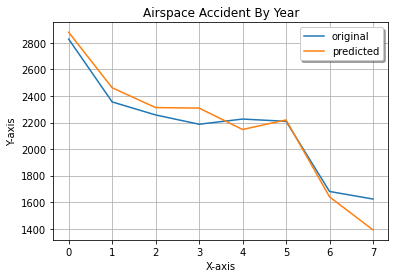

In [73]:
x_ax = range(0, mdata.count())
y_pred=mdata.select("prediction").collect()
y_orig=mdata.select("label").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Airspace Accident By Year")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
 

In [74]:
# Stop session 
spark.stop()  